## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 7*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------



#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import util, morphology

Aplicar diferentes operaciones morfologicas a las siguientes imagenes en escala de grises (si la imagen no esta en grises,
primero convertir a escala de grises): butterfly.jpeg, quetzalgris.png, chestXray.jpeg.

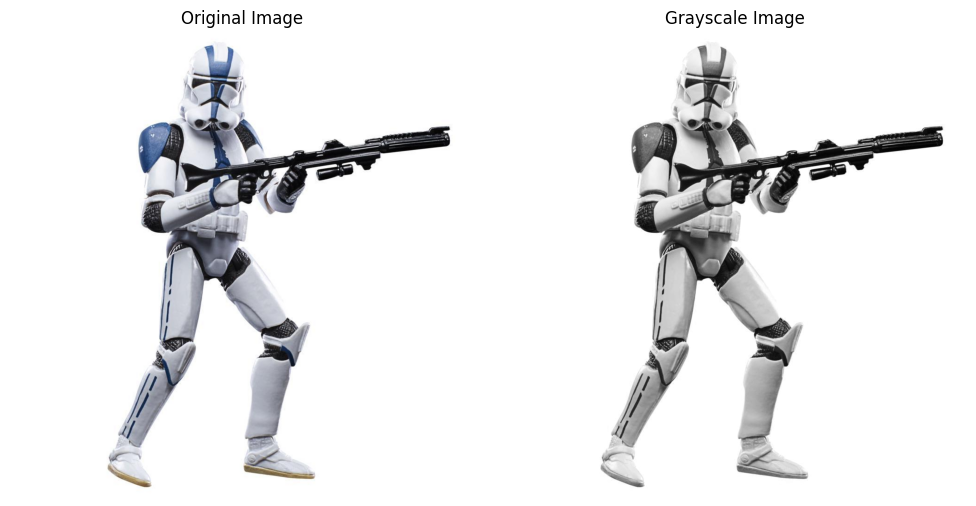

In [4]:
from skimage import io, color
import matplotlib.pyplot as plt

# Cargar la imagen
image_clone_trooper = io.imread('./img/clone-tropper.jpg')
# Convertir la imagen a escala de grises
image_clone_trooper_gray = color.rgb2gray(image_clone_trooper)

# Guardar la imagen en escala de grises
path_clone_trooper_gray = './img/clone-tropper_gray.jpg'
io.imsave(path_clone_trooper_gray, (image_clone_trooper_gray * 255).astype('uint8'))

# Mostrar la imagen original y la imagen en escala de grises
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_clone_trooper)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_clone_trooper_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


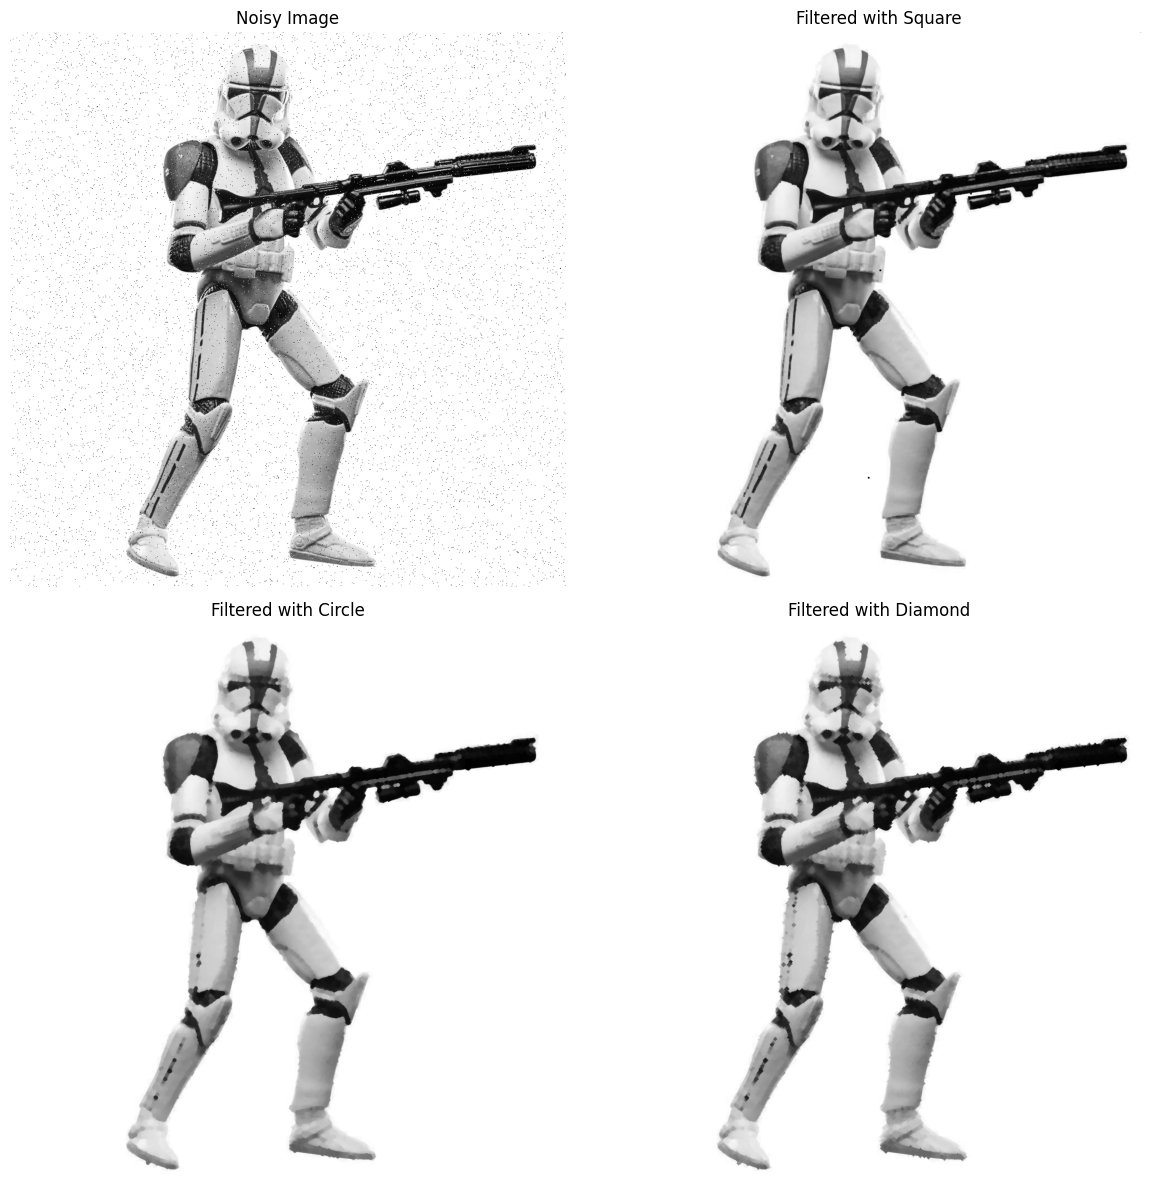

In [5]:
# Since the code environment was reset, we need to reload the grayscale image.
image_clone_trooper_gray = io.imread('./img/clone-tropper_gray.jpg')

# Add synthetic noise to the image
noisy_image = util.random_noise(image_clone_trooper_gray, mode='s&p', amount=0.02)

# Define different structuring elements
selem_square = morphology.square(3)
selem_circle = morphology.disk(3)
# There is no ellipse function in skimage, using diamond as an alternative for an elliptical shape
selem_diamond = morphology.diamond(3)

# Apply sequential filtering: opening followed by closing with different structuring elements
filtered_image_square = morphology.closing(morphology.opening(noisy_image, selem_square), selem_square)
filtered_image_circle = morphology.closing(morphology.opening(noisy_image, selem_circle), selem_circle)
filtered_image_diamond = morphology.closing(morphology.opening(noisy_image, selem_diamond), selem_diamond)

# Display the noisy and filtered images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(noisy_image, cmap='gray')
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(filtered_image_square, cmap='gray')
ax[1].set_title('Filtered with Square')
ax[1].axis('off')

ax[2].imshow(filtered_image_circle, cmap='gray')
ax[2].set_title('Filtered with Circle')
ax[2].axis('off')

ax[3].imshow(filtered_image_diamond, cmap='gray')
ax[3].set_title('Filtered with Diamond')
ax[3].axis('off')

plt.tight_layout()
plt.show()
